In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [3]:
assert(X_train.shape[0]==Y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0]==Y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:]==(28,28)), "The dimension of the images are not 28 x 28"
assert(X_test.shape[1:]==(28,28)), "The dimension of the images are not 28 x 28"

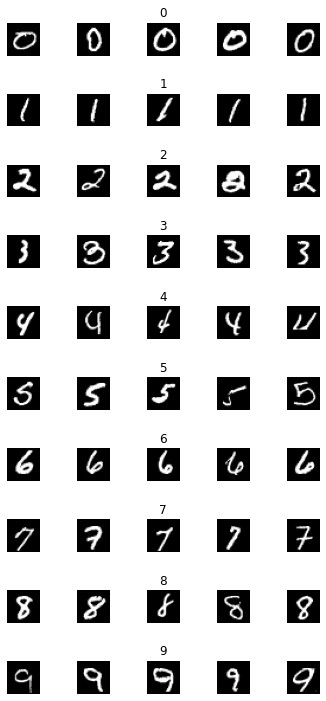

In [4]:
num_of_samples = []
cols = 5
num_classes = 10
fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[Y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

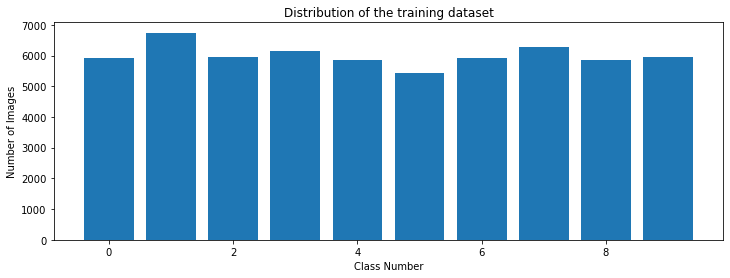

In [5]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [6]:
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=num_pixels,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [10]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train,Y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.5201 - accuracy: 0.8389 - val_loss: 0.2677 - val_accuracy: 0.9202
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2807 - accuracy: 0.9165 - val_loss: 0.2648 - val_accuracy: 0.9185
Epoch 3/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2419 - accuracy: 0.9298 - val_loss: 0.2403 - val_accuracy: 0.9285
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2238 - accuracy: 0.9343 - val_loss: 0.2024 - val_accuracy: 0.9383
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2154 - accuracy: 0.9367 - val_loss: 0.2093 - val_accuracy: 0.9398
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2058 - accuracy: 0.9396 - val_loss: 0.1992 - val_accuracy: 0.9423
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2051 - accuracy: 0.9400 - val_loss: 0.1903 - val_accuracy: 0.9448
Epoch 

Text(0.5, 0, 'epoch')

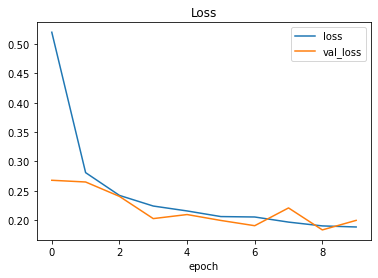

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

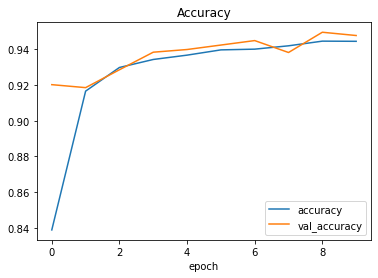

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [14]:
score = model.evaluate(X_test,Y_test,verbose=0)
print(type(score))
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

<class 'list'>
Test Score: 0.22061723470687866
Test Accuracy: 0.9380000233650208


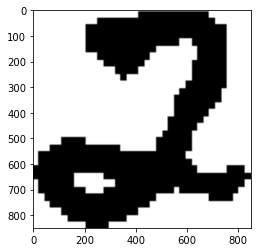

In [15]:
# import requests
from PIL import Image
# url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# response = requests.get(url,stream=True)
# img = Image.open(response.raw)
img = Image.open(r'digit-2.png')
plt.imshow(img)

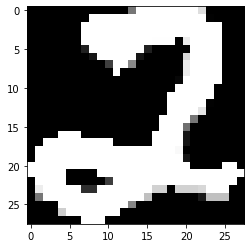

In [16]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [17]:
image = image/255
image = image.reshape(1,784)

In [18]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit: ",str(prediction))

1/1 [==============================] - 0s 153ms/step
Predicted digit:  [3]
